In [2]:
import math
import pandas_datareader.data as pdr
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
d = pd.read_csv('C:\\Users\\KRISH\\OneDrive\\Documents\\EXCEL Data pool\\INFY.csv')
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11-03-1999,1.167969,1.562500,1.167969,1.464844,1.150338,86256000
1,12-03-1999,1.468750,1.523438,1.343750,1.457031,1.144202,19948800
2,15-03-1999,1.460938,1.460938,1.316406,1.324219,1.039905,6336000
3,16-03-1999,1.335938,1.382813,1.312500,1.312500,1.030702,4992000
4,17-03-1999,1.312500,1.398438,1.304688,1.320313,1.036838,7724800


In [6]:
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4622,24-07-2017,15.72,15.80,15.65,15.68,15.68,4577900
4623,25-07-2017,15.74,15.86,15.68,15.81,15.81,5431500
4624,26-07-2017,15.80,15.93,15.78,15.91,15.91,3419200
4625,27-07-2017,15.66,15.80,15.50,15.59,15.59,4293000
4626,28-07-2017,15.80,15.86,15.65,15.71,15.71,3190200


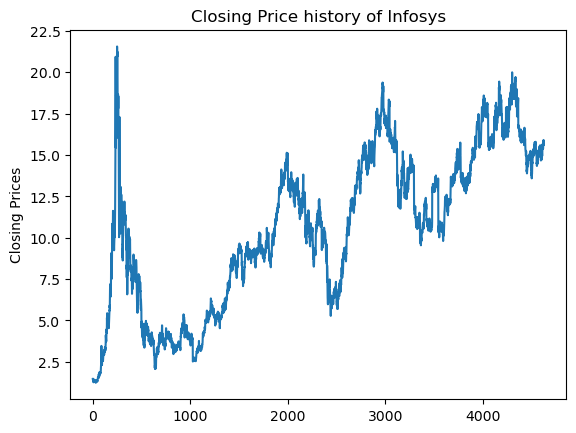

In [8]:
# d['Close'].plot() or
plt.title('Closing Price history of Infosys')
plt.plot(d['Close'])
plt.ylabel('Closing Prices')
plt.show()

<Axes: >

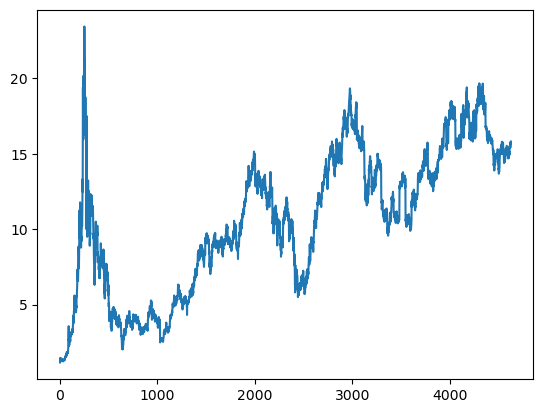

In [17]:
d['Open'].plot()

In [13]:
# Spliting the data 
train = d.iloc[:int(.80*len(d)),:]
test = d.iloc[int(.80*len(d)):,:]

In [14]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,11-03-1999,1.167969,1.562500,1.167969,1.464844,1.150338,86256000
1,12-03-1999,1.468750,1.523438,1.343750,1.457031,1.144202,19948800
2,15-03-1999,1.460938,1.460938,1.316406,1.324219,1.039905,6336000
3,16-03-1999,1.335938,1.382813,1.312500,1.312500,1.030702,4992000
4,17-03-1999,1.312500,1.398438,1.304688,1.320313,1.036838,7724800
...,...,...,...,...,...,...,...
3696,15-11-2013,13.497500,13.695000,13.495000,13.655000,12.595013,4583600
3697,18-11-2013,13.697500,13.895000,13.690000,13.842500,12.767960,5562400
3698,19-11-2013,13.900000,13.925000,13.690000,13.735000,12.668803,3828400
3699,20-11-2013,13.692500,13.717500,13.552500,13.602500,12.546589,2511200


In [15]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
3701,22-11-2013,13.3975,13.5050,13.3550,13.4800,12.433598,3034800
3702,25-11-2013,13.4125,13.4125,13.2950,13.3075,12.274489,4133600
3703,26-11-2013,13.3075,13.4650,13.2075,13.3975,12.357502,3974400
3704,27-11-2013,13.3100,13.3400,13.2250,13.2975,12.265265,4342400
3705,29-11-2013,13.4400,13.6325,13.4075,13.5050,12.456658,1629200
...,...,...,...,...,...,...,...
4622,24-07-2017,15.7200,15.8000,15.6500,15.6800,15.680000,4577900
4623,25-07-2017,15.7400,15.8600,15.6800,15.8100,15.810000,5431500
4624,26-07-2017,15.8000,15.9300,15.7800,15.9100,15.910000,3419200
4625,27-07-2017,15.6600,15.8000,15.5000,15.5900,15.590000,4293000


In [16]:
# Defining the features and target variable
features = ['Open','Volume']
target = ['Close']

In [17]:
#formulating the model
m = xgb.XGBRegressor()
m.fit(train[features],train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
# Making the predictions
predictions = m.predict(test[features])
print('Model Predictions')
print(predictions)

Model Predictions
[13.385739  13.391672  13.402268  13.271502  13.147171  13.479403
 13.418329  13.413081  13.623321  13.653226  13.754915  13.839055
 13.855077  13.559191  13.374152  13.894246  14.004902  13.704229
 14.143292  14.212305  13.97698   14.113578  14.295846  14.614026
 14.202688  14.317004  13.953273  14.252043  14.254018  13.945277
 13.817125  13.880623  14.624956  15.118854  15.039929  15.235625
 15.218518  15.106348  14.880896  15.187012  15.298306  15.050526
 14.863     14.69353   14.678398  14.613508  14.605504  14.559773
 14.29279   14.090807  13.857381  14.397573  14.316292  14.430311
 14.706199  14.397573  14.629152  14.8924675 15.025182  14.978859
 14.994462  14.997165  15.394305  15.402892  15.353283  15.4586115
 15.19086   15.251981  15.461532  15.774585  15.220249  14.951027
 15.0426035 14.546941  13.697212  13.76659   13.850317  13.630745
 13.272785  13.444431  13.627031  13.425523  13.479946  13.523618
 13.269322  13.583521  13.60084   13.739368  13.842045  1

In [19]:
# Actual data values 
print('Actual Values')
print(test[target])

Actual Values
        Close
3701  13.4800
3702  13.3075
3703  13.3975
3704  13.2975
3705  13.5050
...       ...
4622  15.6800
4623  15.8100
4624  15.9100
4625  15.5900
4626  15.7100

[926 rows x 1 columns]


In [20]:
# Models Accuracy
accuracy = m.score(test[features],test[target])
print('Accuracy')
print(accuracy)

Accuracy
0.9600484941442505


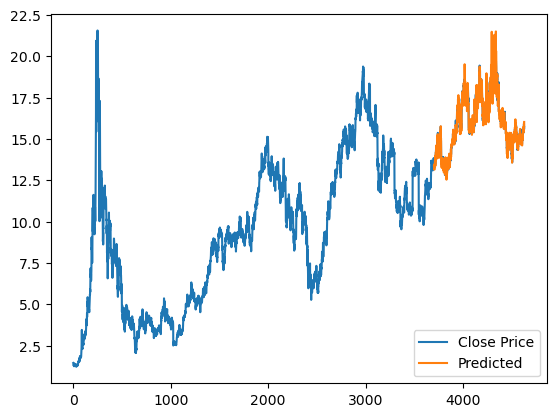

In [21]:
#Ploting the predictions 
plt.plot(d['Close'] , label = "Close Price")
plt.plot(test[target].index , predictions , label = "Predicted")
plt.legend()
plt.show()